# SVM and SVM with Kernals 

This tutorial is adapted from the Notebook Community, with minor updates due to package version changes.
https://notebook.community/steinam/teacher/jup_notebooks/data-science-ipython-notebooks-master/scikit-learn/scikit-learn-svm



In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

## Support Vector Machine Classifier
Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for classification or for regression. SVMs draw a boundary between clusters of data.  SVMs attempt to maximize the margin between sets of points.  Many lines can be drawn to separate the points above:

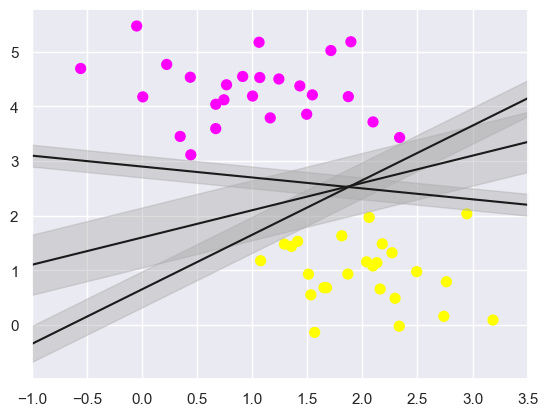

In [2]:
# (old version) from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
            #generates 50 samples divided into 2 clusters, with a standard deviation of 0.60 for each cluster
            #The random_state parameter ensures reproducibility of the dataset
        
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

Fit the model

In [3]:
from sklearn.svm import SVC  # SVC - support vector classifier
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [4]:
# plot the boundary
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In the following plot the dashed lines touch a couple of the points known as support vectors, which are stored in the support_vectors_ attribute of the classifier:

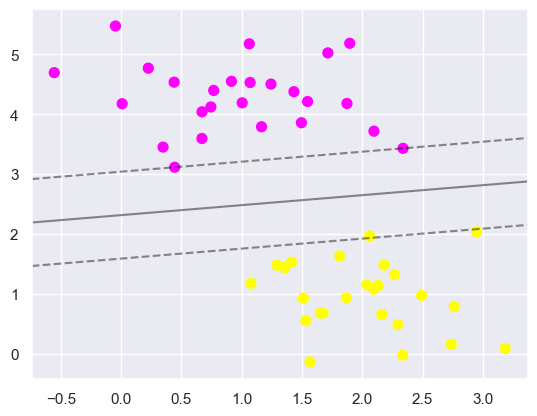

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

Use IPython's interact functionality to explore how the distribution of points affects the support vectors and the discriminative fit:

In [6]:
# (old version) from IPython.html.widgets import interact
from ipywidgets import interact


def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

## Support Vector Machine with Kernels Classifier
Kernels are useful when the decision boundary is not linear.  A Kernel is some functional transformation of the input data.  SVMs have clever tricks to ensure kernel calculations are efficient.  In the example below, a linear boundary is not useful in separating the groups of points:

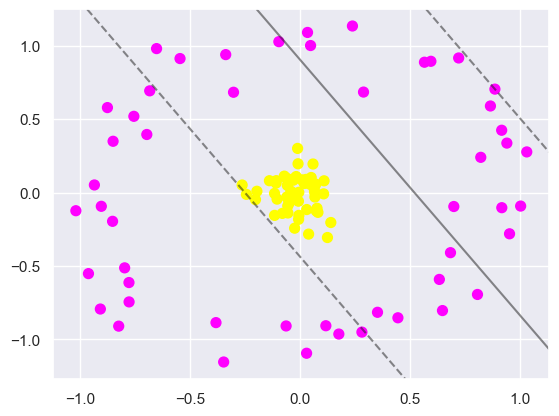

In [7]:
# (old version) from sklearn.datasets.samples_generator import make_circles
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

A simple model that could be useful is a radial basis function:

In [8]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, descript…

In three dimensions, there is a clear separation between the data.  Run the SVM with the rbf kernel:

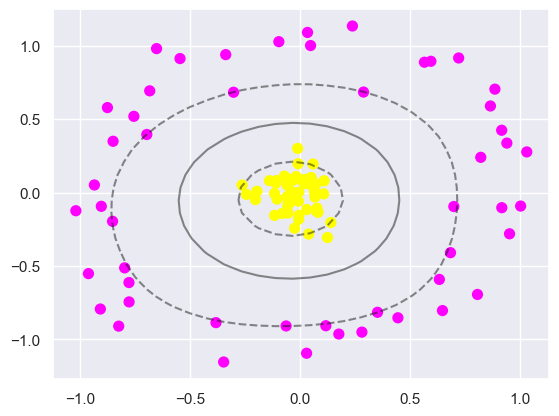

In [9]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');